In [55]:
import os
import sys

if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('../../../AutexysHost/source')
    
from utilities import DataLoggerUtility as dlu
from utilities import DataPlotterUtility as dpu
mplu = dpu.mplu
from utilities import FET_Modeling as fet_model
#from procedures import Device_History as DH

import numpy as np

No handles with labels found to put in legend.


 === Long CNT ink Experiment === 
-- Device On Current:
[1.9224999999999997e-11,
 6.38325e-10,
 8.25745e-09,
 4.772080000000001e-07,
 3.16963e-07,
 7.8001925e-07,
 3.6410175000000003e-07,
 6.693385000000001e-07]
-- Device On Current:
[1.7475e-11,
 1.8475e-11,
 3.1697050000000005e-08,
 2.9273125000000004e-07,
 2.9998325e-07,
 4.0295074999999996e-07,
 2.541035e-07,
 1.2347749999999998e-07]
-- Device On Current:
[1.8725000000000002e-11,
 1.9899999999999997e-11,
 4.038205e-08,
 2.3585525000000002e-07,
 3.20666e-07,
 1.6750949999999998e-07,
 3.1980625e-07,
 3.642085e-07]
-- Device On Current:
[1.8625e-11,
 1.93e-11,
 1.100525e-08,
 8.5559925e-08,
 2.6643824999999995e-07,
 1.8004425e-07,
 8.5308275e-08,
 5.40473e-08]
-- Device On Current:
[1.8275e-11,
 1.8800000000000002e-11,
 7.88845e-09,
 1.00777125e-07,
 1.3864e-07,
 9.8942675e-08,
 1.1912050000000001e-07,
 6.4076325e-08]
-- Device On Current:
[2.1925e-11,
 2.0075e-11,
 1.8834075000000003e-08,
 1.4026225000000002e-06,
 3.6502825e-07,
 4.1

No handles with labels found to put in legend.


[MPL]: Figures saved. (Seconds elapsed: 0.522 s)
[MPL]: Saving figures.
[MPL]: Figures saved. (Seconds elapsed: 0.882 s)


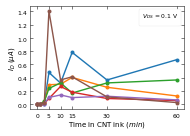

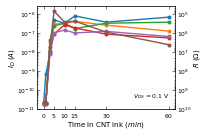

In [56]:
print(' === Long CNT ink Experiment === ')

data_4_20 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/G/4-20', 'DrainSweep.json', minExperiment=1, maxExperiment=8)
data_6_20 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/G/6-20', 'DrainSweep.json', minExperiment=1, maxExperiment=8)
data_7_20 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/G/7,20-TL,BL', 'DrainSweep.json', minExperiment=1, maxExperiment=8)
data_14_20 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/G/14-20', 'DrainSweep.json', minExperiment=1, maxExperiment=8)
data_16_20 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/G/16-20', 'DrainSweep.json', minExperiment=1, maxExperiment=8)
data_17_20 = dlu.loadSpecificDeviceHistory('../../AutexysData/Rubimarie/CNT/JR1/G/17,20-TR,BR', 'DrainSweep.json', minExperiment=1, maxExperiment=8)
data_all = [data_4_20, data_6_20, data_7_20, data_14_20, data_16_20, data_17_20]

import pprint

analysis_all = []
for device_data in data_all:
    on_current_function = lambda current: max(current)
    device_current_data = [{'forward':experiment['Results']['id_data'][0], 'reverse':experiment['Results']['id_data'][1]} for experiment in device_data]
    device_current_data_grouped = [(device_current_data[i],device_current_data[i+1]) for i in range(0,len(device_current_data),2)]
    device_on_current_grouped = [[on_current_function(group[0]['forward']), on_current_function(group[0]['reverse']), on_current_function(group[1]['forward']), on_current_function(group[1]['reverse'])] for group in device_current_data_grouped]
    print('-- Device On Current:')
    device_on_current_averaged = [float(np.mean(group)) for group in device_on_current_grouped]
    pprint.pprint(device_on_current_averaged)
    analysis_all.append(device_on_current_averaged)

fig1, ax1 = dpu.makeBlankPlot(figsize=(2.75,2))
for plotted_data in analysis_all:
    
    ax1.plot([0,1,3,5,10,15,30,60], np.array(plotted_data)*1e6, marker='o', markersize='4', label='')
ax1.legend(loc="best", title="$V_{DS}$ = 0.1 V")
ax1.set_ylabel('$I_{D}$ ($µA$)')
ax1.set_xlabel('Time in CNT ink ($min$)')
ax1.set_xticks([0,5,10,15,30,60])
dpu.saveExternalPlot(fig1, 'Rubi-CNT-ink-experiment')

fig2, ax2 = dpu.makeBlankPlot(figsize=(3,2))
for plotted_data in analysis_all:
    ax2.plot([0,1,3,5,10,15,30,60], plotted_data, marker='o', markersize='4', label='')
ax2.set_yscale('log')
ax2.legend(loc="best", title="$V_{DS}$ = 0.1 V")
ax2.set_ylabel('$I_{D}$ ($A$)')
ax2.set_xlabel('Time in CNT ink ($min$)')
ax2.set_xticks([0,5,10,15,30,60])
ax2b = ax2.twinx()
ax2b.set_yscale('log')
ax2b.set_ylim(bottom=abs(0.1/ax2.get_ylim()[0]), top=abs(0.1/ax2.get_ylim()[1]))
ax2b.set_ylabel('$R$ ($Ω$)')
fig2.tight_layout()
dpu.saveExternalPlot(fig2, 'Rubi-CNT-ink-experiment-log')